# Imports

In [1]:
from pydatautils.utils.notebook_utils import Utils
Utils.fix_to_pandas()

In [2]:
from utils import DataTypes, DropPerfectCorrCols, Dummyfy, Simple_Imputer

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dataset

In [4]:
df = pd.read_csv('car_price.csv')
print(df.shape)
df.pprint()

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,"2,011",premium unleaded (required),335.000,6.000,MANUAL,rear wheel drive,2.000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,"3,916","46,135"
1,BMW,1 Series,"2,011",premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Convertible,28,19,"3,916","40,650"
2,BMW,1 Series,"2,011",premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,28,20,"3,916","36,350"
3,BMW,1 Series,"2,011",premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Coupe,28,18,"3,916","29,450"
4,BMW,1 Series,"2,011",premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Luxury,Compact,Convertible,28,18,"3,916","34,500"


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,"2,011",premium_unleaded_(required),335.000,6.000,manual,rear_wheel_drive,2.000,"factory_tuner,luxury,high-performance",compact,coupe,26,19,"3,916","46,135"
1,bmw,1_series,"2,011",premium_unleaded_(required),300.000,6.000,manual,rear_wheel_drive,2.000,"luxury,performance",compact,convertible,28,19,"3,916","40,650"
2,bmw,1_series,"2,011",premium_unleaded_(required),300.000,6.000,manual,rear_wheel_drive,2.000,"luxury,high-performance",compact,coupe,28,20,"3,916","36,350"
3,bmw,1_series,"2,011",premium_unleaded_(required),230.000,6.000,manual,rear_wheel_drive,2.000,"luxury,performance",compact,coupe,28,18,"3,916","29,450"
4,bmw,1_series,"2,011",premium_unleaded_(required),230.000,6.000,manual,rear_wheel_drive,2.000,luxury,compact,convertible,28,18,"3,916","34,500"


In [8]:
data_types = DataTypes('msrp')
y = df['msrp']
X = data_types.fit_transform(df)

make
model
engine_fuel_type
transmission_type
driven_wheels
market_category
vehicle_size
vehicle_style
float64 -> float32  engine_hp
float64 -> float32  engine_cylinders
float64 -> float32 -> object (nunique <= 20 & na_count > 0 & count_float == 0) engine_cylinders
float64 -> float32  number_of_doors
float64 -> float32 -> object (nunique <= 20 & na_count > 0 & count_float == 0) number_of_doors
int64 -> float32  year
int64 -> float32  highway_mpg
int64 -> float32  city_mpg
int64 -> float32  popularity


/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[\,\}\{\]\[\:\"\']", "")
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:92: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:93: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[\,\}\{\]\[\:\"\']", "")


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [118]:
df_train = X_train.copy()
df_train['target'] = y_train

In [119]:
print(df_train.shape)
df_train.drop_duplicates(keep='first', ignore_index=True, inplace=True)
print(df_train.shape)

(9531, 16)
(9074, 16)


In [120]:
# Validar si hay filas con features duplicadas

In [121]:
_df = df_train.fillna(0).groupby([x for x in df_train.columns if x != 'target']).count().sort_values('target', ascending=False).reset_index()
_df.pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,target
0,toyota,sienna,"2,017.000",regular_unleaded,296.000,6.000,automatic,front_wheel_drive,4.000,0,large,passenger_minivan,27.000,19.000,"2,031.000",11
1,toyota,sienna,"2,015.000",regular_unleaded,266.000,6.000,automatic,front_wheel_drive,4.000,0,large,passenger_minivan,25.000,18.000,"2,031.000",11
2,suzuki,xl7,"2,007.000",regular_unleaded,252.000,6.000,automatic,front_wheel_drive,4.000,crossover,midsize,4dr_suv,22.000,16.000,481.000,9
3,suzuki,xl7,"2,007.000",regular_unleaded,252.000,6.000,automatic,all_wheel_drive,4.000,crossover,midsize,4dr_suv,21.000,16.000,481.000,9
4,subaru,b9_tribeca,"2,006.000",premium_unleaded_(required),250.000,6.000,automatic,all_wheel_drive,4.000,crossover,midsize,4dr_suv,21.000,16.000,640.000,9


In [122]:
_df.shape

(5784, 16)

In [123]:
df_train['target_2'] = df_train.fillna(0).groupby([x for x in df_train.columns if x != 'target'])['target'].transform('mean')
print(df_train.shape)
df_train.pprint()

(9074, 17)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,target,target_2
0,gmc,sonoma,"2,002.000",flex-fuel_(unleaded/e85),120.000,4.000,manual,rear_wheel_drive,3.000,flex_fuel,compact,extended_cab_pickup,25.000,19.000,549.000,"15,957","15,957.000"
1,toyota,pickup,"1,994.000",regular_unleaded,150.000,6.000,manual,four_wheel_drive,2.000,NaN,compact,extended_cab_pickup,17.000,14.000,"2,031.000","2,423","2,561.000"
2,toyota,tundra,"2,015.000",flex-fuel_(unleaded/e85),381.000,8.000,automatic,four_wheel_drive,2.000,flex_fuel,large,regular_cab_pickup,17.000,13.000,"2,031.000","32,170","32,170.000"
3,audi,s5,"2,016.000",premium_unleaded_(required),333.000,6.000,automated_manual,all_wheel_drive,2.000,"factory_tuner,luxury,performance",midsize,coupe,28.000,18.000,"3,105.000","54,100","57,225.000"
4,lincoln,mkc,"2,016.000",regular_unleaded,240.000,4.000,automatic,front_wheel_drive,4.000,"crossover,luxury",compact,4dr_suv,29.000,20.000,61.000,"33,260","38,935.000"


In [124]:
df_train[df_train['engine_fuel_type'].isna()].pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,target,target_2
3101,suzuki,verona,"2,004.000",NaN,155.000,6.000,automatic,front_wheel_drive,4.000,NaN,midsize,sedan,25.000,17.000,481.000,"18,499","18,632.333"
4762,suzuki,verona,"2,004.000",NaN,155.000,6.000,automatic,front_wheel_drive,4.000,NaN,midsize,sedan,25.000,17.000,481.000,"17,199","18,632.333"
8677,suzuki,verona,"2,004.000",NaN,155.000,6.000,automatic,front_wheel_drive,4.000,NaN,midsize,sedan,25.000,17.000,481.000,"20,199","18,632.333"


In [125]:
print(df_train.shape)
df_train.drop_duplicates(subset=[x for x in df_train.columns if x not in ('target', 'target_2')], keep='first', ignore_index=True, inplace=True)
print(df_train.shape)

(9074, 17)
(5784, 17)


In [126]:
df_train[df_train['engine_fuel_type'].isna()].pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,target,target_2
2567,suzuki,verona,"2,004.000",NaN,155.000,6.000,automatic,front_wheel_drive,4.000,NaN,midsize,sedan,25.000,17.000,481.000,"18,499","18,632.333"


In [127]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [128]:
t_true = df_train['target']
y_pred = df_train['target_2']

In [129]:
mse = mean_squared_error(t_true, y_pred)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(t_true, y_pred)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  4282.894761727735
R2_score :  0.9965085035076966


In [130]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

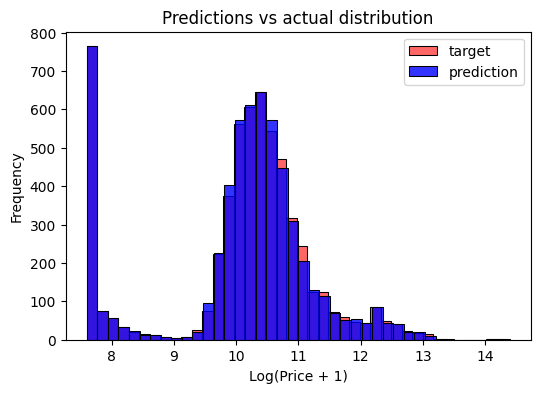

In [131]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(t_true), label='target', color='red', alpha=0.6, bins=40)
sns.histplot(np.log1p(y_pred), label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [133]:
X_train = df_train.drop(['target', 'target_2'], axis=1).copy()
y_train = df_train['target_2'].copy()

In [134]:
__df_nulls = pd.DataFrame(X_train.isna().sum() / X_train.shape[0], columns=['nulls_per_train'])
__df_nulls[__df_nulls['nulls_per_train'] != 0].pprint2()

,nulls_per_train
engine_fuel_type,0.000
engine_hp,0.006
engine_cylinders,0.003
number_of_doors,0.001
market_category,0.298


In [135]:
__df_nulls = pd.DataFrame(X_test.isna().sum() / X_test.shape[0], columns=['nulls_per_test'])
__df_nulls[__df_nulls['nulls_per_test'] != 0].pprint2()

,nulls_per_test
engine_hp,0.009
engine_cylinders,0.000
number_of_doors,0.001
market_category,0.308


In [136]:
X_train[X_train['engine_fuel_type'].isna()].pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2567,suzuki,verona,"2,004.000",NaN,155.000,6.000,automatic,front_wheel_drive,4.000,NaN,midsize,sedan,25.000,17.000,481.000


In [113]:
# Baseline

In [139]:
X_train.value_counts('year', sort=True)

year
2,015.000    921
2,016.000    914
2,017.000    739
2,014.000    296
2,012.000    197
2,009.000    194
2,008.000    181
2,013.000    174
2,007.000    156
2,010.000    153
2,011.000    152
2,003.000    142
2,004.000    135
1,993.000    133
2,005.000    120
2,002.000    119
2,006.000    105
1,994.000    103
1,997.000    102
1,992.000    101
2,001.000     91
1,991.000     89
1,995.000     89
1,996.000     84
1,998.000     79
2,000.000     78
1,999.000     69
1,990.000     68
dtype: int64

In [140]:
X_train['year'].max()

2017.0

In [141]:
X_train['year'].isna().sum()

0

In [142]:
X_train['year'] = 2017 - X_train.year

In [144]:
string_columns = list(X_train.dtypes[X_train.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [145]:
__df_nulls = pd.DataFrame(X_train.isna().sum() / X_train.shape[0], columns=['nulls_per_train'])
__df_nulls[__df_nulls['nulls_per_train'] != 0].pprint2()

,nulls_per_train
engine_fuel_type,0.000
engine_hp,0.006
engine_cylinders,0.003
number_of_doors,0.001
market_category,0.298


In [146]:
ohe = pd.get_dummies(data=X_train, dummy_na=True, columns=string_columns)
ohe.pprint()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bentley,make_bmw,make_bugatti,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_ferrari,make_fiat,make_ford,make_genesis,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_kia,make_lamborghini,make_land_rover,make_lexus,make_lincoln,make_lotus,make_maserati,make_maybach,make_mazda,make_mclaren,make_mercedes-benz,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_rolls-royce,make_saab,make_scion,make_spyker,make_subaru,make_suzuki,make_tesla,make_toyota,make_volkswagen,make_volvo,make_nan,model_100,model_124_spider,model_190-class,model_1_series,model_1_series_m,model_2,model_200,model_200sx,model_240,model_240sx,model_2_series,model_3,model_300,model_300-class,model_3000gt,model_300m,model_300zx,model_323,model_350-class,model_350z,model_360,model_370z,model_3_series,model_3_series_gran_turismo,model_400-class,model_420-class,model_456m,model_458_italia,model_4_series,model_4_series_gran_coupe,model_4c,model_4runner,model_5,model_500,model_500-class,model_500e,model_500l,model_500x,model_560-class,model_57,model_575m,model_599,model_5_series,model_5_series_gran_turismo,model_6,model_600-class,model_6000,model_612_scaglietti,model_62,model_626,model_650s_coupe,model_650s_spider,model_6_series,model_6_series_gran_coupe,model_718_cayman,model_740,model_760,model_780,model_7_series,model_80,model_850,model_86,model_8_series,model_9-2x,model_9-3,model_9-3_griffin,model_9-4x,model_9-5,model_9-7x,model_90,model_900,model_9000,model_911,model_928,model_929,model_940,model_944,model_960,model_968,model_a3,model_a4,model_a4_allroad,model_a5,model_a6,model_a7,model_a8,model_acadia,model_acadia_limited,model_accent,model_acclaim,model_accord,model_accord_crosstour,model_accord_hybrid,model_accord_plug-in_hybrid,model_achieva,model_activehybrid_5,model_activehybrid_7,model_activehybrid_x6,model_aerio,model_aerostar,model_alero,model_allante,model_allroad,model_allroad_quattro,model_alpina_b6_gran_coupe,model_alpina_b7,model_altima,model_altima_hybrid,model_amanti,model_amg_gt,model_armada,model_arnage,model_aspen,model_aspire,model_astro,model_astro_cargo,model_ats,model_ats-v,model_ats_coupe,model_aurora,model_avalanche,model_avalon,model_avalon_hybrid,model_avenger,model_aventador,model_aveo,model_aviator,model_axxess,model_azera,model_aztek,model_azure,model_azure_t,model_b-class_electric_drive,model_b-series,model_b-series_pickup,model_b-series_truck,model_b9_tribeca,model_baja,model_beetle,model_beetle_convertible,model_beretta,model_black_diamond_avalanche,model_blackwood,model_blazer,model_bolt_ev,model_bonneville,model_borrego,model_boxster,model_bravada,model_breeze,model_bronco,model_bronco_ii,model_brooklands,model_brougham,model_brz,model_c-class,model_c-max_hybrid,model_c/k_1500_series,model_c/k_2500_series,model_c30,model_c36_amg,model_c43_amg,model_c70,model_c8,model_cabrio,model_cabriolet,model_cadenza,model_caliber,model_california,model_california_t,model_camaro,model_camry,model_camry_hybrid,model_camry_solara,model_canyon,model_caprice,model_captiva_sport,model_caravan,model_cascada,model_catera,model_cavalier,model_cayenne,model_cayman,model_cc,model_celebrity,model_celica,model_century,model_challenger,model_charger,model_chevy_van,model_ciera,model_cirrus,model_city_express,model_civic,model_civic_crx,model_civic_del_sol,model_cl,model_cl-class,model_cla-class,model_classic,model_clk-class,model_cls-class,model_cobalt,model_colorado,model_colt,model_concorde,model_continental,model_continental_flying_spur,model_continental_flying_spur_speed,model_continental_gt,model_continental_gt3-r,model_continental_gt_speed,model_continental_gt_speed_convertible,model_continental_gtc,model_continental_gtc_speed,model_continental_supersports,model_continental_supersports_convertible,model_contour,model_contour_svt,model_co

In [147]:
__df_nulls = pd.DataFrame(ohe.isna().sum() / ohe.shape[0], columns=['nulls_per_train'])
__df_nulls[__df_nulls['nulls_per_train'] != 0].pprint2()

,nulls_per_train
engine_hp,0.006
engine_cylinders,0.003
number_of_doors,0.001


In [148]:
X_train_baseline = ohe.fillna(0)

In [149]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_baseline, y_train)

LinearRegression()

In [151]:
from sklearn.model_selection import cross_val_score

In [153]:
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train_baseline, y = y_train, cv = 10)
cv_linear.mean()

-1338003295838.2104

In [179]:
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train_baseline)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
r2_score_linear_train

0.9938392466582437

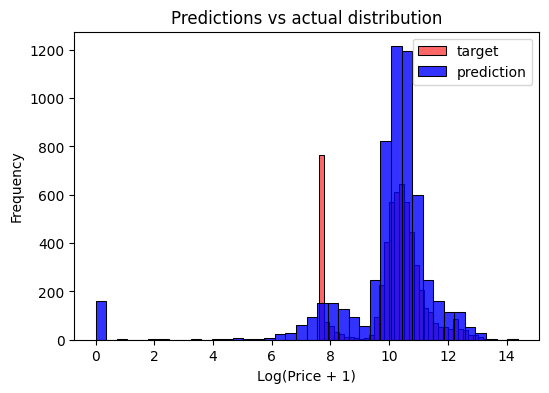

In [180]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(y_train), label='target', color='red', alpha=0.6, bins=40)
sns.histplot(np.log1p(y_pred_linear_train), label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [181]:
# y_pred_linear_train = regressor_linear.predict(X_train_baseline)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  5766.099474241974
R2_score :  0.9938392466582437


In [182]:
mse = mean_squared_error(np.log1p(y_train), np.log1p(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.log1p(y_train), np.log1p(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  1.325842082249406
R2_score :  -0.14349485933531114


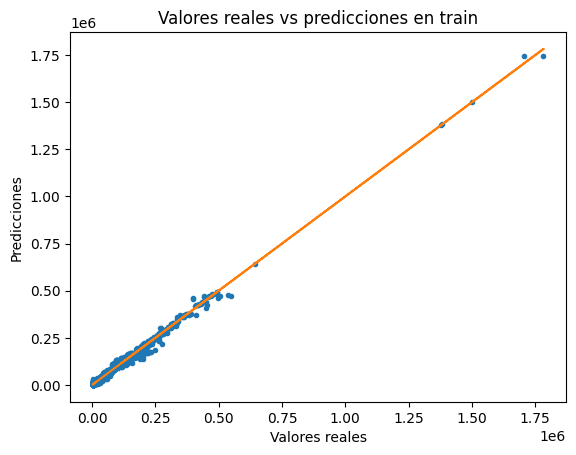

In [184]:
plt.title("Valores reales vs predicciones en train")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
_ = plt.plot(y_train, y_pred_linear_train, ".", y_train, y_train, "-")

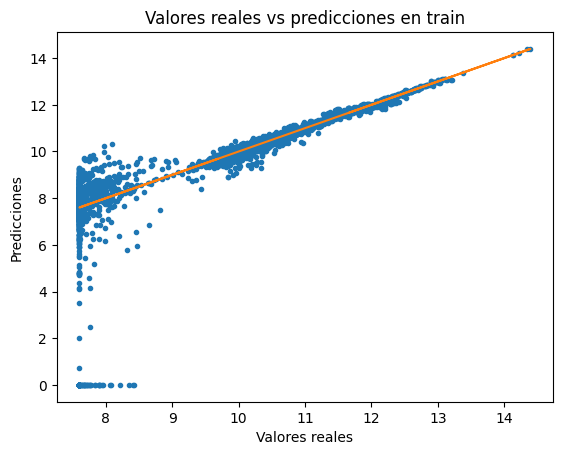

In [183]:
plt.title("Valores reales vs predicciones en train")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
_ = plt.plot(np.log1p(y_train), np.log1p(y_pred_linear_train), ".", np.log1p(y_train), np.log1p(y_train), "-")

In [188]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train_baseline, np.log1p(y_train))
y_pred_linear_train = regressor_linear.predict(X_train_baseline)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
r2_score_linear_train = r2_score(np.log1p(y_train), y_pred_linear_train)
r2_score_linear_train

0.9836314005265924

In [187]:
mse = mean_squared_error(np.log1p(y_train), y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.log1p(y_train), y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.15862822043298663
R2_score :  0.9836314005265924


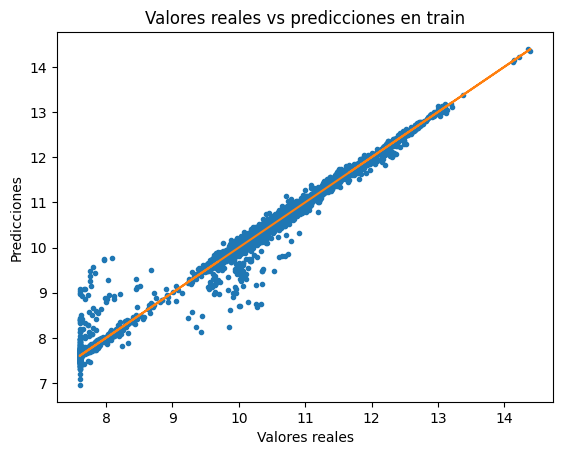

In [192]:
plt.title("Valores reales vs predicciones en train")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
_ = plt.plot(np.log1p(y_train), y_pred_linear_train, ".", np.log1p(y_train), np.log1p(y_train), "-")

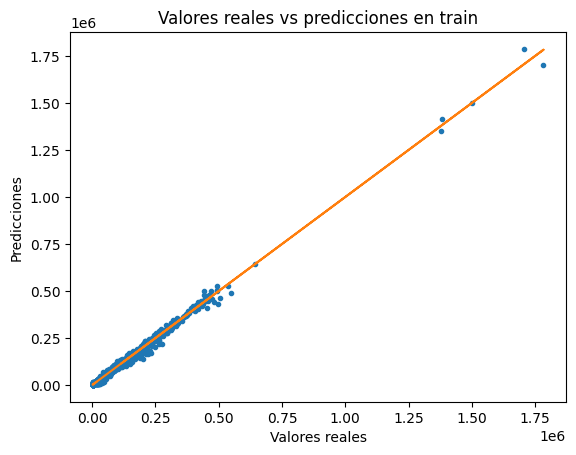

In [193]:
plt.title("Valores reales vs predicciones en train")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
_ = plt.plot(y_train, np.expm1(y_pred_linear_train), ".", y_train, y_train, "-")

In [194]:
mse = mean_squared_error(y_train, np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  5512.550134633018
R2_score :  0.9943691408375811


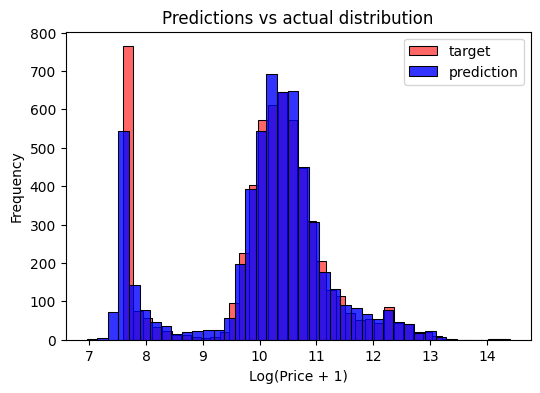

In [197]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(y_train), label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_linear_train, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [214]:
X_train_baseline.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity', 'make_acura', 'make_alfa_romeo', 'make_aston_martin',
       ...
       'vehicle_style_convertible_suv', 'vehicle_style_coupe', 'vehicle_style_crew_cab_pickup', 'vehicle_style_extended_cab_pickup', 'vehicle_style_passenger_minivan', 'vehicle_style_passenger_van', 'vehicle_style_regular_cab_pickup', 'vehicle_style_sedan', 'vehicle_style_wagon', 'vehicle_style_nan'], dtype='object', length=1074)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [252]:
X_train['year'] = 2017 - X_train.year
X_test['year'] = 2017 - X_test.year

In [253]:
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [254]:
ohe_train = pd.get_dummies(data=X_train, dummy_na=True, columns=string_columns).fillna(0)[X_train_baseline.columns]
ohe_test = pd.get_dummies(data=X_test, dummy_na=True, columns=string_columns).fillna(0)

In [255]:
for col_ in X_train_baseline.columns:
    if col_ not in ohe_test.columns:
        ohe_test[col_] = 0
ohe_test = ohe_test[X_train_baseline.columns]

/tmp/ipykernel_18898/2822264766.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ohe_test[col_] = 0
/tmp/ipykernel_18898/2822264766.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ohe_test[col_] = 0
/tmp/ipykernel_18898/2822264766.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ohe_test[co

In [256]:
y_pred_linear_train = regressor_linear.predict(ohe_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
r2_score_linear_train = r2_score(np.log1p(y_train), y_pred_linear_train)
r2_score_linear_train

0.9800510263220148

In [262]:
y_pred_linear_train = regressor_linear.predict(ohe_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
r2_score_linear_train = r2_score(np.log1p(y_test), y_pred_linear_train)
r2_score_linear_train

0.9641185834919271

In [264]:
y_pred_linear_train = regressor_linear.predict(ohe_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(np.log1p(y_train), y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.log1p(y_train), y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(y_train, np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.156250534118018
R2_score :  0.9800510263220148
RMSE:  6799.313187825723
R2_score :  0.9881622816538974


In [265]:
y_pred_linear_train = regressor_linear.predict(ohe_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(np.log1p(y_test), y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.log1p(y_test), y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(y_test, np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_test, np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.20897074278581898
R2_score :  0.9641185834919271
RMSE:  11585.207012369512
R2_score :  0.945048183776521


In [305]:
i = 99
ad = X_test.iloc[i].to_dict()
ad

{'make': 'audi',
 'model': 'a7',
 'year': 2.0,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 310.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury,performance',
 'vehicle_size': 'large',
 'vehicle_style': 'sedan',
 'highway_mpg': 28.0,
 'city_mpg': 18.0,
 'popularity': 3105.0}

In [306]:
y_test.iloc[i]

69750

In [307]:
ohe_test.iloc[[i]]

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bentley,make_bmw,make_bugatti,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_ferrari,make_fiat,make_ford,make_genesis,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_kia,make_lamborghini,make_land_rover,make_lexus,make_lincoln,make_lotus,make_maserati,make_maybach,make_mazda,make_mclaren,make_mercedes-benz,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_rolls-royce,make_saab,make_scion,make_spyker,make_subaru,make_suzuki,make_tesla,make_toyota,make_volkswagen,make_volvo,make_nan,model_100,model_124_spider,model_190-class,model_1_series,model_1_series_m,model_2,model_200,model_200sx,model_240,model_240sx,model_2_series,model_3,model_300,model_300-class,model_3000gt,model_300m,model_300zx,model_323,model_350-class,model_350z,model_360,model_370z,model_3_series,model_3_series_gran_turismo,model_400-class,model_420-class,model_456m,model_458_italia,model_4_series,model_4_series_gran_coupe,model_4c,model_4runner,model_5,model_500,model_500-class,model_500e,model_500l,model_500x,model_560-class,model_57,model_575m,model_599,model_5_series,model_5_series_gran_turismo,model_6,model_600-class,model_6000,model_612_scaglietti,model_62,model_626,model_650s_coupe,model_650s_spider,model_6_series,model_6_series_gran_coupe,model_718_cayman,model_740,model_760,model_780,model_7_series,model_80,model_850,model_86,model_8_series,model_9-2x,model_9-3,model_9-3_griffin,model_9-4x,model_9-5,model_9-7x,model_90,model_900,model_9000,model_911,model_928,model_929,model_940,model_944,model_960,model_968,model_a3,model_a4,model_a4_allroad,model_a5,model_a6,model_a7,model_a8,model_acadia,model_acadia_limited,model_accent,model_acclaim,model_accord,model_accord_crosstour,model_accord_hybrid,model_accord_plug-in_hybrid,model_achieva,model_activehybrid_5,model_activehybrid_7,model_activehybrid_x6,model_aerio,model_aerostar,model_alero,model_allante,model_allroad,model_allroad_quattro,model_alpina_b6_gran_coupe,model_alpina_b7,model_altima,model_altima_hybrid,model_amanti,model_amg_gt,model_armada,model_arnage,model_aspen,model_aspire,model_astro,model_astro_cargo,model_ats,model_ats-v,model_ats_coupe,model_aurora,model_avalanche,model_avalon,model_avalon_hybrid,model_avenger,model_aventador,model_aveo,model_aviator,model_axxess,model_azera,model_aztek,model_azure,model_azure_t,model_b-class_electric_drive,model_b-series,model_b-series_pickup,model_b-series_truck,model_b9_tribeca,model_baja,model_beetle,model_beetle_convertible,model_beretta,model_black_diamond_avalanche,model_blackwood,model_blazer,model_bolt_ev,model_bonneville,model_borrego,model_boxster,model_bravada,model_breeze,model_bronco,model_bronco_ii,model_brooklands,model_brougham,model_brz,model_c-class,model_c-max_hybrid,model_c/k_1500_series,model_c/k_2500_series,model_c30,model_c36_amg,model_c43_amg,model_c70,model_c8,model_cabrio,model_cabriolet,model_cadenza,model_caliber,model_california,model_california_t,model_camaro,model_camry,model_camry_hybrid,model_camry_solara,model_canyon,model_caprice,model_captiva_sport,model_caravan,model_cascada,model_catera,model_cavalier,model_cayenne,model_cayman,model_cc,model_celebrity,model_celica,model_century,model_challenger,model_charger,model_chevy_van,model_ciera,model_cirrus,model_city_express,model_civic,...,model_ssr,model_stanza,model_stealth,model_stratus,model_sts,model_sts-v,model_suburban,model_sunbird,model_sundance,model_sunfire,model_superamerica,model_supersports_convertible_isr,model_supra,model_svx,model_swift,model_sx4,model_syclone,model_t100,model_tacoma,model_tahoe,model_tahoe_hybrid,model_tahoe_limited/z71,model_taurus,model_taurus_x,model_tc,model_tempo,model_tercel,model_terrain,model_terraza,model_thunderbird,model_tiburon,model_tiguan,model_titan,model_tl,model_tlx,model_toronado,model_torrent,model_touareg

In [308]:
test_pred = regressor_linear.predict(ohe_test.iloc[[i]])[0]
suggestion = np.expm1(test_pred)
suggestion

67588.60238806916

In [663]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [664]:
df_train = X_train.copy()
df_train['target'] = y_train

In [665]:
print(df_train.shape)
df_train.drop_duplicates(keep='first', ignore_index=True, inplace=True)
print(df_train.shape)

(9531, 16)
(9074, 16)


In [666]:
df_train['target_2'] = df_train.fillna(0).groupby([x for x in df_train.columns if x != 'target'])['target'].transform('mean')
print(df_train.shape)
df_train.drop_duplicates(subset=[x for x in df_train.columns if x not in ('target', 'target_2')], keep='first', ignore_index=True, inplace=True)
print(df_train.shape)

(9074, 17)
(5784, 17)


In [667]:
X_train = df_train.drop(['target', 'target_2'], axis=1).copy()
y_train = df_train['target_2'].copy()

In [668]:
X_train['engine_cylinders'] = X_train['engine_cylinders'].fillna(0)
X_train['year'] = 2017 - X_train.year

In [669]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
ct = ColumnTransformer([("scaler", StandardScaler(), ['year','engine_cylinders','engine_hp', 'highway_mpg', 'city_mpg', 'popularity'])])

In [670]:
X_train_2 = pd.DataFrame(ct.fit_transform(X_train), columns=['sc_year','sc_engine_cylinders','sc_engine_hp', 'sc_highway_mpg', 'sc_city_mpg', 'sc_popularity'])

In [671]:
X_train = X_train.join(X_train_2)
X_train.pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity
0,gmc,sonoma,15.000,flex-fuel_(unleaded/e85),120.000,4.000,manual,rear_wheel_drive,3.000,flex_fuel,compact,extended_cab_pickup,25.000,19.000,549.000,0.932,-0.905,-1.135,-0.140,-0.047,-0.663
1,toyota,pickup,23.000,regular_unleaded,150.000,6.000,manual,four_wheel_drive,2.000,NaN,compact,extended_cab_pickup,17.000,14.000,"2,031.000",1.932,0.135,-0.885,-0.980,-0.586,0.365
2,toyota,tundra,2.000,flex-fuel_(unleaded/e85),381.000,8.000,automatic,four_wheel_drive,2.000,flex_fuel,large,regular_cab_pickup,17.000,13.000,"2,031.000",-0.695,1.175,1.035,-0.980,-0.694,0.365
3,audi,s5,1.000,premium_unleaded_(required),333.000,6.000,automated_manual,all_wheel_drive,2.000,"factory_tuner,luxury,performance",midsize,coupe,28.000,18.000,"3,105.000",-0.820,0.135,0.636,0.175,-0.155,1.110
4,lincoln,mkc,1.000,regular_unleaded,240.000,4.000,automatic,front_wheel_drive,4.000,"crossover,luxury",compact,4dr_suv,29.000,20.000,61.000,-0.820,-0.905,-0.137,0.280,0.061,-1.001


In [672]:
X_train[X_train['engine_hp'].isnull()].pprint()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity
51,tesla,model_s,3.000,electric,NaN,0.000,direct_drive,rear_wheel_drive,4.000,"exotic,performance",large,sedan,97.000,94.000,"1,391.000",-0.570,-2.984,NaN,7.418,8.038,-0.079
233,lincoln,mkz,0.000,regular_unleaded,NaN,4.000,automatic,front_wheel_drive,4.000,"luxury,hybrid",midsize,sedan,38.000,41.000,61.000,-0.945,-0.905,NaN,1.225,2.324,-1.001
325,lincoln,continental,0.000,premium_unleaded_(recommended),NaN,6.000,automatic,front_wheel_drive,4.000,luxury,large,sedan,27.000,18.000,61.000,-0.945,0.135,NaN,0.070,-0.155,-1.001
392,kia,soul_ev,1.000,electric,NaN,0.000,direct_drive,front_wheel_drive,4.000,NaN,compact,wagon,92.000,120.000,"1,720.000",-0.820,-2.984,NaN,6.893,10.841,0.150
815,ford,escape,0.000,regular_unleaded,NaN,4.000,automatic,front_wheel_drive,4.000,crossover,compact,4dr_suv,30.000,23.000,"5,657.000",-0.945,-0.905,NaN,0.385,0.384,2.880


In [673]:
X_train.drop(['year','engine_cylinders','engine_hp', 'highway_mpg', 'city_mpg', 'popularity'], axis=1, inplace=True)

In [674]:
X_train['market_category'] = X_train['market_category'].fillna('NA')

In [675]:
X_train.isna().sum()

make                    0
model                   0
engine_fuel_type        1
transmission_type       0
driven_wheels           0
number_of_doors         3
market_category         0
vehicle_size            0
vehicle_style           0
sc_year                 0
sc_engine_cylinders     0
sc_engine_hp           34
sc_highway_mpg          0
sc_city_mpg             0
sc_popularity           0
dtype: int64

In [676]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

X_train = X_train.join(
                pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(X_train['market_category'].str.split(',')),
                index=X_train.index,
                columns='market_category_' + mlb.classes_)).drop('market_category', axis=1)
X_train.pprint()

,make,model,engine_fuel_type,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity,market_category_NA,market_category_crossover,market_category_diesel,market_category_exotic,market_category_factory_tuner,market_category_flex_fuel,market_category_hatchback,market_category_high-performance,market_category_hybrid,market_category_luxury,market_category_performance
0,gmc,sonoma,flex-fuel_(unleaded/e85),manual,rear_wheel_drive,3.000,compact,extended_cab_pickup,0.932,-0.905,-1.135,-0.140,-0.047,-0.663,0,0,0,0,0,1,0,0,0,0,0
1,toyota,pickup,regular_unleaded,manual,four_wheel_drive,2.000,compact,extended_cab_pickup,1.932,0.135,-0.885,-0.980,-0.586,0.365,1,0,0,0,0,0,0,0,0,0,0
2,toyota,tundra,flex-fuel_(unleaded/e85),automatic,four_wheel_drive,2.000,large,regular_cab_pickup,-0.695,1.175,1.035,-0.980,-0.694,0.365,0,0,0,0,0,1,0,0,0,0,0
3,audi,s5,premium_unleaded_(required),automated_manual,all_wheel_drive,2.000,midsize,coupe,-0.820,0.135,0.636,0.175,-0.155,1.110,0,0,0,0,1,0,0,0,0,1,1
4,lincoln,mkc,regular_unleaded,automatic,front_wheel_drive,4.000,compact,4dr_suv,-0.820,-0.905,-0.137,0.280,0.061,-1.001,0,1,0,0,0,0,0,0,0,1,0


In [677]:
for v in [2, 3, 4]:
    feature = 'num_doors_%s' % v
    X_train[feature] = (X_train['number_of_doors'].fillna(4) == v).astype(int)
X_train.drop(['number_of_doors'], axis=1, inplace=True)
X_train.pprint()

,make,model,engine_fuel_type,transmission_type,driven_wheels,vehicle_size,vehicle_style,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity,market_category_NA,market_category_crossover,market_category_diesel,market_category_exotic,market_category_factory_tuner,market_category_flex_fuel,market_category_hatchback,market_category_high-performance,market_category_hybrid,market_category_luxury,market_category_performance,num_doors_2,num_doors_3,num_doors_4
0,gmc,sonoma,flex-fuel_(unleaded/e85),manual,rear_wheel_drive,compact,extended_cab_pickup,0.932,-0.905,-1.135,-0.140,-0.047,-0.663,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,toyota,pickup,regular_unleaded,manual,four_wheel_drive,compact,extended_cab_pickup,1.932,0.135,-0.885,-0.980,-0.586,0.365,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,toyota,tundra,flex-fuel_(unleaded/e85),automatic,four_wheel_drive,large,regular_cab_pickup,-0.695,1.175,1.035,-0.980,-0.694,0.365,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,audi,s5,premium_unleaded_(required),automated_manual,all_wheel_drive,midsize,coupe,-0.820,0.135,0.636,0.175,-0.155,1.110,0,0,0,0,1,0,0,0,0,1,1,1,0,0
4,lincoln,mkc,regular_unleaded,automatic,front_wheel_drive,compact,4dr_suv,-0.820,-0.905,-0.137,0.280,0.061,-1.001,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [678]:
from sklearn.pipeline import Pipeline
from utils import DataTypes, DropPerfectCorrCols, Dummyfy, Simple_Imputer

In [679]:
p1 = ("DataTypes", DataTypes("target"))
p2 = ("simple_imputer", Simple_Imputer())
p3 = ("dummyfy", Dummyfy())
p4 = ("DropPerfectCorrCols", DropPerfectCorrCols())

In [680]:
pl = Pipeline([p1, p2, p3, p4])

In [681]:
X_train = pl.fit_transform(X_train)
X_train.pprint()

/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[\,\}\{\]\[\:\"\']", "")
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:92: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:93: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[\,\}\{\]\[\:\"\']", "")
/home/ncortes/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.

make
model
engine_fuel_type
transmission_type
driven_wheels
vehicle_size
vehicle_style
float64 -> float32  sc_year
float64 -> float32  sc_engine_cylinders
float64 -> float32  sc_engine_hp
float64 -> float32  sc_highway_mpg
float64 -> float32  sc_city_mpg
float64 -> float32  sc_popularity
int64 -> object (nunique <= 20) market_category_NA
int64 -> object (nunique <= 20) market_category_crossover
int64 -> object (nunique <= 20) market_category_diesel
int64 -> object (nunique <= 20) market_category_exotic
int64 -> object (nunique <= 20) market_category_factory_tuner
int64 -> object (nunique <= 20) market_category_flex_fuel
int64 -> object (nunique <= 20) market_category_hatchback
int64 -> object (nunique <= 20) market_category_high-performance
int64 -> object (nunique <= 20) market_category_hybrid
int64 -> object (nunique <= 20) market_category_luxury
int64 -> object (nunique <= 20) market_category_performance
int64 -> object (nunique <= 20) num_doors_2
int64 -> object (nunique <= 20) num

,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_ferrari,make_fiat,make_ford,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_kia,make_lamborghini,make_land_rover,make_lexus,make_lincoln,make_lotus,make_maserati,make_maybach,make_mazda,make_mclaren,make_mercedes-benz,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_rolls-royce,make_saab,make_scion,make_spyker,make_subaru,make_suzuki,make_toyota,make_volkswagen,make_volvo,model_100,model_124_spider,model_190-class,model_1_series,model_1_series_m,model_2,model_200,model_200sx,model_240,model_240sx,model_2_series,model_3,model_300,model_300-class,model_3000gt,model_300m,model_300zx,model_323,model_350-class,model_350z,model_360,model_370z,model_3_series,model_3_series_gran_turismo,model_400-class,model_420-class,model_456m,model_458_italia,model_4_series,model_4_series_gran_coupe,model_4runner,model_5,model_500,model_500-class,model_500e,model_500l,model_500x,model_560-class,model_57,model_575m,model_599,model_5_series,model_5_series_gran_turismo,model_6,model_600-class,model_6000,model_612_scaglietti,model_62,model_626,model_650s_coupe,model_650s_spider,model_6_series,model_6_series_gran_coupe,model_718_cayman,model_740,model_760,model_780,model_7_series,model_80,model_850,model_86,model_8_series,model_9-2x,model_9-3,model_9-3_griffin,model_9-4x,model_9-5,model_9-7x,model_90,model_900,model_9000,model_911,model_928,model_929,model_940,model_944,model_960,model_968,model_a3,model_a4,model_a4_allroad,model_a5,model_a6,model_a7,model_a8,model_acadia,model_acadia_limited,model_accent,model_acclaim,model_accord,model_accord_crosstour,model_accord_hybrid,model_accord_plug-in_hybrid,model_achieva,model_activehybrid_5,model_activehybrid_7,model_activehybrid_x6,model_aerio,model_aerostar,model_alero,model_allante,model_allroad,model_allroad_quattro,model_alpina_b6_gran_coupe,model_alpina_b7,model_altima,model_altima_hybrid,model_amanti,model_amg_gt,model_armada,model_arnage,model_aspen,model_aspire,model_astro,model_astro_cargo,model_ats,model_ats-v,model_ats_coupe,model_aurora,model_avalanche,model_avalon,model_avalon_hybrid,model_avenger,model_aventador,model_aveo,model_aviator,model_axxess,model_azera,model_aztek,model_azure,model_azure_t,model_b-class_electric_drive,model_b-series,model_b-series_pickup,model_b-series_truck,model_b9_tribeca,model_baja,model_beetle,model_beetle_convertible,model_beretta,model_black_diamond_avalanche,model_blackwood,model_blazer,model_bolt_ev,model_bonneville,model_borrego,model_boxster,model_bravada,model_breeze,model_bronco,model_bronco_ii,model_brooklands,model_brougham,model_brz,model_c-class,model_c-max_hybrid,model_c/k_1500_series,model_c/k_2500_series,model_c30,model_c36_amg,model_c43_amg,model_c70,model_cabrio,model_cabriolet,model_cadenza,model_caliber,model_california,model_california_t,model_camaro,model_camry,model_camry_hybrid,model_camry_solara,model_canyon,model_caprice,model_captiva_sport,model_caravan,model_cascada,model_catera,model_cavalier,model_cayenne,model_cayman,model_cc,model_celebrity,model_celica,model_century,model_challenger,model_charger,model_chevy_van,model_ciera,model_cirrus,model_city_express,model_civic,model_civic_crx,model_civic_del_sol,model_cl,model_cl-class,model_cla-class,model_classic,model_clk-class,model_cls-class,model_cobalt,model_colorado,model_colt,model_concorde,model_continental,model_continental_flying_spur,model_continental_flying_spur_speed,model_continental_gt,model_continental_gt3-r,model_continental_gt_speed,model_continental_gt_speed_convertible,model_continental_gtc,model_continental_gtc_speed,model_continental_supersports,model_continental_supersports_convertible,model_contour,model_contour_svt,model_corniche,model_corolla,model_corolla_im,model_corrado,model_cors

In [599]:
__df_nulls = pd.DataFrame(X_train.isna().sum() / X_train.shape[0], columns=['nulls_per_train'])
__df_nulls[__df_nulls['nulls_per_train'] != 0].pprint2()

,nulls_per_train


In [682]:
y_train = np.log1p(y_train)

In [601]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [602]:
# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
r2_score_linear_train

0.9834483301049901

In [603]:
y_pred_linear_train = regressor_linear.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.15951282232470856
R2_score :  0.9834483301049901
RMSE:  5864.582084219316
R2_score :  0.9936270032185381


In [604]:
regressor_linear.feature_names_in_

array(['sc_year', 'sc_engine_cylinders', 'sc_engine_hp', ...,
       'num_doors_2_1', 'num_doors_3_1', 'num_doors_4_1'], dtype=object)

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)
print(X_train.shape)

(9531, 15)


In [690]:
def transform_x(df_x):
    df_x['engine_cylinders'] = df_x['engine_cylinders'].fillna(0)
    df_x['year'] = 2017 - df_x.year
    df_x_2 = pd.DataFrame(ct.transform(df_x),
                          index=df_x.index,
                          columns=['sc_year','sc_engine_cylinders','sc_engine_hp', 'sc_highway_mpg', 'sc_city_mpg', 'sc_popularity'])
    df_x = df_x.join(df_x_2)
    df_x.drop(['year','engine_cylinders','engine_hp', 'highway_mpg', 'city_mpg', 'popularity'], axis=1, inplace=True)
    df_x['market_category'] = df_x['market_category'].fillna('NA')
    mlb = MultiLabelBinarizer(sparse_output=True)
    df_x = df_x.join(
            pd.DataFrame.sparse.from_spmatrix(
            mlb.fit_transform(df_x['market_category'].str.split(',')),
            index=df_x.index,
            columns='market_category_' + mlb.classes_)).drop('market_category', axis=1)
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df_x[feature] = (df_x['number_of_doors'].fillna(4) == v).astype(int)
    df_x.drop(['number_of_doors'], axis=1, inplace=True)    
    df_x = pl.transform(df_x)
    for _col in regressor_linear.feature_names_in_:
        if _col not in df_x.columns:
            print(_col)
            df_x[_col] = 0
    return df_x[regressor_linear.feature_names_in_]

In [691]:
X_train = transform_x(X_train)
X_test = transform_x(X_test)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:92: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:93: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[\,\}\{\]\[\:\"\']", "")
/home/ncortes/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:92: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[,]','')
/home/ncortes/lab/github/stxpro_py_ds_books_summary/explore/utils.py:93: FutureWarning: The default value of r

In [692]:
y_pred_linear_train = regressor_linear.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.15676165333576034
R2_score :  0.9799203006165628
RMSE:  6971.347163990241
R2_score :  0.9875556753704812


In [693]:
y_pred_linear_train = regressor_linear.predict(X_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_test, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_test, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_test), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.2085273252606749
R2_score :  0.9642706963514464
RMSE:  10239.78549912231
R2_score :  0.9570704661747403


In [687]:
# train_x = X_train.copy()
# train_y = y_train.copy()

In [688]:
train_x.shape

(5784, 1005)

In [729]:
from xgboost import XGBRegressor, XGBRFRegressor
regressor_xgbrf = XGBRegressor(n_estimators = 500, random_state = 0)
regressor_xgbrf.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [730]:
y_pred_linear_train = regressor_xgbrf.predict(train_x)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(train_y, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(train_y, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(train_y), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(train_y), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.038139403679543674
R2_score :  0.999053766292871
RMSE:  2838.1007978083185
R2_score :  0.9985074627045369


In [731]:
y_pred_linear_train = regressor_xgbrf.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.06669452785691829
R2_score :  0.9963653889632886
RMSE:  5414.376888420148
R2_score :  0.992493545143495


In [733]:
y_pred_linear_train = regressor_xgbrf.predict(X_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_test, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_test, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_test), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.09111795291990119
R2_score :  0.9931780816812261
RMSE:  5668.386482886236
R2_score :  0.9868449239994268


In [713]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=0)

In [714]:
y_pred_linear_train = regressor_rf.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.06227406588069235
R2_score :  0.9968312207926568
RMSE:  10887.301515201085
R2_score :  0.9696486221234509


In [715]:
y_pred_linear_train = regressor_rf.predict(X_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_test, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_test, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_test), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.0964405359075522
R2_score :  0.992357809896487
RMSE:  7878.821828493066
R2_score :  0.9745845962711666


In [723]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [724]:
def constructor_modelo():
    # Definición del modelo
    modelo = keras.Sequential(
        [
            layers.Dense(64, activation="relu", input_shape=[X_train.shape[1]]),
            layers.Dense(64, activation="relu"),
            layers.Dense(1),
        ]
    )

    # Definición del optimizador
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    # Compilación del modelo
    modelo.compile(loss="mse", optimizer=optimizer, metrics=["mae", "mse"])
    return modelo
# Muestro un punto por cada una de las épocas completadas
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        print(".", end="")

model = constructor_modelo()
EPOCHS = 1000
# historico = model.fit(
#     X_train,
#     y_train,
#     epochs=EPOCHS,
#     validation_split=0.1,
#     verbose=0,
#     callbacks=[PrintDot()],
# )

In [725]:
model = constructor_modelo()
EPOCHS = 1000
historico = model.fit(
    train_x,
    train_y,
    epochs=EPOCHS,
    validation_split=0.02,
    verbose=0,
    callbacks=[PrintDot()],
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [714]:
y_pred_linear_train = model.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.06227406588069235
R2_score :  0.9968312207926568
RMSE:  10887.301515201085
R2_score :  0.9696486221234509


In [726]:
y_pred_linear_train = model.predict(X_test)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_test, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_test, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_test), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

75/75 [==============================] - 0s 1ms/step
RMSE:  0.17523189915176557
R2_score :  0.9747695531415141
RMSE:  9324.123594798577
R2_score :  0.9644048770592085


# Metrics

In [734]:
y_pred_linear_train = regressor_xgbrf.predict(X_test)

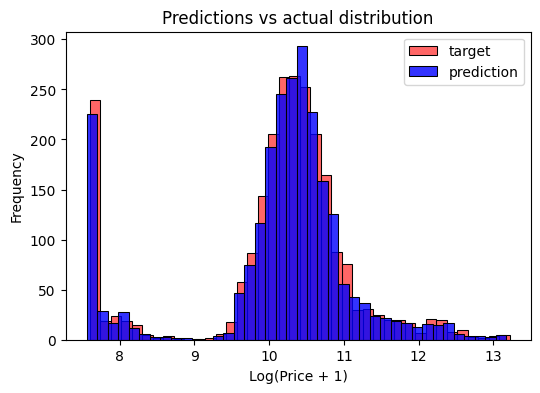

In [735]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred_linear_train, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

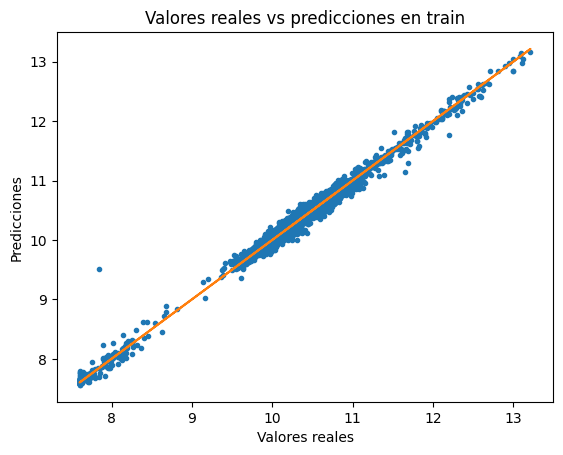

In [738]:
plt.title("Valores reales vs predicciones en train")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
_ = plt.plot(y_test, y_pred_linear_train, ".", y_test, y_test, "-")

In [740]:
__X_train, __X_test, __y_train, __y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [813]:
__X_test2 = __X_test.copy().reset_index()

In [821]:
__X_test2.value_counts('make')

make
chevrolet        224
ford             177
volkswagen       166
toyota           156
dodge            128
gmc               97
nissan            94
honda             92
mazda             87
suzuki            74
cadillac          74
bmw               71
mercedes-benz     71
infiniti          66
audi              65
hyundai           60
volvo             57
kia               48
subaru            48
acura             46
lexus             46
buick             43
chrysler          43
mitsubishi        36
pontiac           35
lincoln           32
porsche           32
land_rover        24
saab              23
plymouth          20
ferrari           19
oldsmobile        19
aston_martin      18
fiat              15
bentley           15
lamborghini       13
maserati          11
scion              8
tesla              8
rolls-royce        6
lotus              6
hummer             5
alfa_romeo         2
mclaren            1
genesis            1
maybach            1
dtype: int64

In [850]:
__X_test2[__X_test2['make'] == 'chevrolet'].pprint()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3,"8,765",chevrolet,s-10,"2,002.000",regular_unleaded,190.000,6.000,automatic,rear_wheel_drive,2.000,performance,compact,regular_cab_pickup,20.000,15.000,"1,385.000"
8,"10,784",chevrolet,trax,"2,017.000",regular_unleaded,138.000,4.000,automatic,front_wheel_drive,4.000,crossover,compact,4dr_suv,33.000,25.000,"1,385.000"
10,"9,467",chevrolet,silverado_1500_classic,"2,007.000",flex-fuel_(unleaded/e85),295.000,8.000,automatic,rear_wheel_drive,4.000,flex_fuel,large,crew_cab_pickup,19.000,14.000,"1,385.000"
12,"8,748",chevrolet,s-10,"2,002.000",flex-fuel_(unleaded/e85),120.000,4.000,automatic,rear_wheel_drive,3.000,flex_fuel,compact,extended_cab_pickup,23.000,17.000,"1,385.000"
28,"10,745",chevrolet,traverse,"2,015.000",regular_unleaded,281.000,6.000,automatic,front_wheel_drive,4.000,crossover,midsize,4dr_suv,24.000,17.000,"1,385.000"


In [843]:
i = 441
ad = __X_test.iloc[i].to_dict()
ad

{'make': 'lamborghini',
 'model': 'aventador',
 'year': 2016.0,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 750.0,
 'engine_cylinders': 12.0,
 'transmission_type': 'automated_manual',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'exotic,high-performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'coupe',
 'highway_mpg': 18.0,
 'city_mpg': 11.0,
 'popularity': 1158.0}

In [844]:
np.expm1(y_test.iloc[i])

490699.9999999996

In [845]:
X_test.iloc[[i]]

,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_ferrari,make_fiat,make_ford,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_kia,make_lamborghini,make_land_rover,make_lexus,make_lincoln,make_lotus,make_maserati,make_maybach,make_mazda,make_mclaren,make_mercedes-benz,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_rolls-royce,make_saab,make_scion,make_spyker,make_subaru,make_suzuki,make_toyota,make_volkswagen,make_volvo,model_100,model_124_spider,model_190-class,model_1_series,model_1_series_m,model_2,model_200,model_200sx,model_240,model_240sx,model_2_series,model_3,model_300,model_300-class,model_3000gt,model_300m,model_300zx,model_323,model_350-class,model_350z,model_360,model_370z,model_3_series,model_3_series_gran_turismo,model_400-class,model_420-class,model_456m,model_458_italia,model_4_series,model_4_series_gran_coupe,model_4runner,model_5,model_500,model_500-class,model_500e,model_500l,model_500x,model_560-class,model_57,model_575m,model_599,model_5_series,model_5_series_gran_turismo,model_6,model_600-class,model_6000,model_612_scaglietti,model_62,model_626,model_650s_coupe,model_650s_spider,model_6_series,model_6_series_gran_coupe,model_718_cayman,model_740,model_760,model_780,model_7_series,model_80,model_850,model_86,model_8_series,model_9-2x,model_9-3,model_9-3_griffin,model_9-4x,model_9-5,model_9-7x,model_90,model_900,model_9000,model_911,model_928,model_929,model_940,model_944,model_960,model_968,model_a3,model_a4,model_a4_allroad,model_a5,model_a6,model_a7,model_a8,model_acadia,model_acadia_limited,model_accent,model_acclaim,model_accord,model_accord_crosstour,model_accord_hybrid,model_accord_plug-in_hybrid,model_achieva,model_activehybrid_5,model_activehybrid_7,model_activehybrid_x6,model_aerio,model_aerostar,model_alero,model_allante,model_allroad,model_allroad_quattro,model_alpina_b6_gran_coupe,model_alpina_b7,model_altima,model_altima_hybrid,model_amanti,model_amg_gt,model_armada,model_arnage,model_aspen,model_aspire,model_astro,model_astro_cargo,model_ats,model_ats-v,model_ats_coupe,model_aurora,model_avalanche,model_avalon,model_avalon_hybrid,model_avenger,model_aventador,model_aveo,model_aviator,model_axxess,model_azera,model_aztek,model_azure,model_azure_t,model_b-class_electric_drive,model_b-series,model_b-series_pickup,model_b-series_truck,model_b9_tribeca,model_baja,model_beetle,model_beetle_convertible,model_beretta,model_black_diamond_avalanche,model_blackwood,model_blazer,model_bolt_ev,model_bonneville,model_borrego,model_boxster,model_bravada,model_breeze,model_bronco,model_bronco_ii,model_brooklands,model_brougham,model_brz,model_c-class,model_c-max_hybrid,model_c/k_1500_series,model_c/k_2500_series,model_c30,model_c36_amg,model_c43_amg,model_c70,model_cabrio,model_cabriolet,model_cadenza,model_caliber,model_california,model_california_t,model_camaro,model_camry,model_camry_hybrid,model_camry_solara,model_canyon,model_caprice,model_captiva_sport,model_caravan,model_cascada,model_catera,model_cavalier,model_cayenne,model_cayman,model_cc,model_celebrity,model_celica,model_century,model_challenger,model_charger,model_chevy_van,model_ciera,model_cirrus,model_city_express,model_civic,model_civic_crx,model_civic_del_sol,model_cl,model_cl-class,model_cla-class,model_classic,model_clk-class,...,model_safari,model_safari_cargo,model_samurai,model_santa_fe,model_santa_fe_sport,model_savana,model_savana_cargo,model_sc_300,model_sc_430,model_scoupe,model_sebring,model_sedona,model_sentra,model_sephia,model_sequoia,model_seville,model_shadow,model_shelby_gt350,model_shelby_gt500,model_sidekick,model_sienna,model_sierra_1500,model_sierra_1500_classic,model_sierra_1500_hybrid,model_sierra_1500hd,model_sierra_c3,model_sierra_classic_1500,model_sigma,model_silhouette,model_silver

In [846]:
test_pred = regressor_xgbrf.predict(X_test.iloc[[i]])[0]
suggestion = np.expm1(test_pred)
suggestion

510257.4

In [847]:
test_pred = regressor_linear.predict(X_test.iloc[[i]])[0]
suggestion = np.expm1(test_pred)
suggestion

471489.8

In [848]:
test_pred = model.predict(X_test.iloc[[i]])[0][0]
suggestion = np.expm1(test_pred)
suggestion

1/1 [==============================] - 0s 23ms/step


489507.53

In [858]:
i = 3
ad = __X_test.iloc[i].to_dict()
ad

{'make': 'chevrolet',
 'model': 's-10',
 'year': 2002.0,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 190.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'performance',
 'vehicle_size': 'compact',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 20.0,
 'city_mpg': 15.0,
 'popularity': 1385.0}

In [859]:
np.expm1(y_test.iloc[i])

18943.999999999993

In [860]:
X_test.iloc[[i]]

,sc_year,sc_engine_cylinders,sc_engine_hp,sc_highway_mpg,sc_city_mpg,sc_popularity,make_acura,make_alfa_romeo,make_aston_martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_ferrari,make_fiat,make_ford,make_gmc,make_honda,make_hummer,make_hyundai,make_infiniti,make_kia,make_lamborghini,make_land_rover,make_lexus,make_lincoln,make_lotus,make_maserati,make_maybach,make_mazda,make_mclaren,make_mercedes-benz,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_rolls-royce,make_saab,make_scion,make_spyker,make_subaru,make_suzuki,make_toyota,make_volkswagen,make_volvo,model_100,model_124_spider,model_190-class,model_1_series,model_1_series_m,model_2,model_200,model_200sx,model_240,model_240sx,model_2_series,model_3,model_300,model_300-class,model_3000gt,model_300m,model_300zx,model_323,model_350-class,model_350z,model_360,model_370z,model_3_series,model_3_series_gran_turismo,model_400-class,model_420-class,model_456m,model_458_italia,model_4_series,model_4_series_gran_coupe,model_4runner,model_5,model_500,model_500-class,model_500e,model_500l,model_500x,model_560-class,model_57,model_575m,model_599,model_5_series,model_5_series_gran_turismo,model_6,model_600-class,model_6000,model_612_scaglietti,model_62,model_626,model_650s_coupe,model_650s_spider,model_6_series,model_6_series_gran_coupe,model_718_cayman,model_740,model_760,model_780,model_7_series,model_80,model_850,model_86,model_8_series,model_9-2x,model_9-3,model_9-3_griffin,model_9-4x,model_9-5,model_9-7x,model_90,model_900,model_9000,model_911,model_928,model_929,model_940,model_944,model_960,model_968,model_a3,model_a4,model_a4_allroad,model_a5,model_a6,model_a7,model_a8,model_acadia,model_acadia_limited,model_accent,model_acclaim,model_accord,model_accord_crosstour,model_accord_hybrid,model_accord_plug-in_hybrid,model_achieva,model_activehybrid_5,model_activehybrid_7,model_activehybrid_x6,model_aerio,model_aerostar,model_alero,model_allante,model_allroad,model_allroad_quattro,model_alpina_b6_gran_coupe,model_alpina_b7,model_altima,model_altima_hybrid,model_amanti,model_amg_gt,model_armada,model_arnage,model_aspen,model_aspire,model_astro,model_astro_cargo,model_ats,model_ats-v,model_ats_coupe,model_aurora,model_avalanche,model_avalon,model_avalon_hybrid,model_avenger,model_aventador,model_aveo,model_aviator,model_axxess,model_azera,model_aztek,model_azure,model_azure_t,model_b-class_electric_drive,model_b-series,model_b-series_pickup,model_b-series_truck,model_b9_tribeca,model_baja,model_beetle,model_beetle_convertible,model_beretta,model_black_diamond_avalanche,model_blackwood,model_blazer,model_bolt_ev,model_bonneville,model_borrego,model_boxster,model_bravada,model_breeze,model_bronco,model_bronco_ii,model_brooklands,model_brougham,model_brz,model_c-class,model_c-max_hybrid,model_c/k_1500_series,model_c/k_2500_series,model_c30,model_c36_amg,model_c43_amg,model_c70,model_cabrio,model_cabriolet,model_cadenza,model_caliber,model_california,model_california_t,model_camaro,model_camry,model_camry_hybrid,model_camry_solara,model_canyon,model_caprice,model_captiva_sport,model_caravan,model_cascada,model_catera,model_cavalier,model_cayenne,model_cayman,model_cc,model_celebrity,model_celica,model_century,model_challenger,model_charger,model_chevy_van,model_ciera,model_cirrus,model_city_express,model_civic,model_civic_crx,model_civic_del_sol,model_cl,model_cl-class,model_cla-class,model_classic,model_clk-class,...,model_safari,model_safari_cargo,model_samurai,model_santa_fe,model_santa_fe_sport,model_savana,model_savana_cargo,model_sc_300,model_sc_430,model_scoupe,model_sebring,model_sedona,model_sentra,model_sephia,model_sequoia,model_seville,model_shadow,model_shelby_gt350,model_shelby_gt500,model_sidekick,model_sienna,model_sierra_1500,model_sierra_1500_classic,model_sierra_1500_hybrid,model_sierra_1500hd,model_sierra_c3,model_sierra_classic_1500,model_sigma,model_silhouette,model_silver

In [861]:
test_pred = regressor_xgbrf.predict(X_test.iloc[[i]])[0]
suggestion = np.expm1(test_pred)
suggestion

21129.105

In [862]:
test_pred = regressor_linear.predict(X_test.iloc[[i]])[0]
suggestion = np.expm1(test_pred)
suggestion

19103.066

In [863]:
test_pred = model.predict(X_test.iloc[[i]])[0][0]
suggestion = np.expm1(test_pred)
suggestion

1/1 [==============================] - 0s 20ms/step


19359.604

In [864]:
y_pred_linear_train = regressor_xgbrf.predict(X_train)
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.06669452785691829
R2_score :  0.9963653889632886
RMSE:  5414.376888420148
R2_score :  0.992493545143495


In [757]:
__X_train, __X_test, __y_train, __y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [758]:
df_train = __X_train.copy()
df_train['target'] = __y_train

In [759]:
df_train['target_2'] = df_train.fillna(0).groupby([x for x in df_train.columns if x != 'target'])['target'].transform('mean')

In [760]:
y_pred_linear_train = np.log1p(df_train['target_2'])
y_pred_linear_train = np.where(y_pred_linear_train < 0, 0, y_pred_linear_train)
mse = mean_squared_error(y_train, y_pred_linear_train)
rmse = (np.sqrt(mse))
r2_score_ = r2_score(y_train, y_pred_linear_train)
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

mse = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_linear_train))
rmse = (np.sqrt(mse))
r2_score_ = r2_score(np.expm1(y_train), np.expm1(y_pred_linear_train))
print("RMSE: ", rmse)
print('R2_score : ', r2_score_)

RMSE:  0.05590150724912
R2_score :  0.9974465663838022
RMSE:  4858.101283735859
R2_score :  0.9939567433235365
